# Time Series Forescasting

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import pandas_datareader as data
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
#Saham yang akan dimodelkan
#,"ASII.JK","ICBP.JK","JSMR.JK"
tickers = "ANTM.JK"
#range dari tanggal yang dibutuhkan
today = date.today()
# print(today)
start_date = '2010-01-01'
# end_date = today
end_date = '2022-03-10'
#ambil data
panel_data = data.DataReader(tickers, 'yahoo',start_date, end_date)
panel_data


close = panel_data["Close"]

all_weekdays = pd.date_range(start = start_date,    end= end_date, freq='B')

close = close.reindex(all_weekdays)

close = close.dropna()

# # #print(all_weekdays)

# dataframe = close
# dataset = dataframe.values
# dataset = dataset.astype('float32')
# panel_data.index = pd.DatetimeIndex(panel_data.index).to_period('M')

In [9]:
panel_data["Close"].head()

Date
2010-01-04    1931.946777
2010-01-05    1931.946777
2010-01-06    1931.946777
2010-01-07    1973.945557
2010-01-08    1973.945557
Name: Close, dtype: float64

<AxesSubplot:xlabel='Date'>

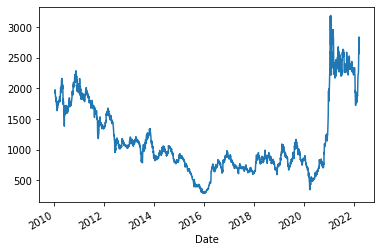

In [10]:
panel_data.Close.plot()

Stationary means mean, variance and covariance is constant over periods.

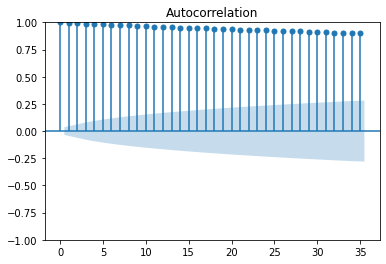

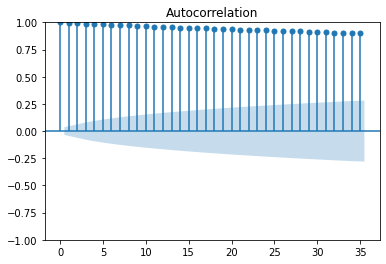

In [12]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(panel_data['Close'])

### Converting series to stationary

In [13]:
close_diff = panel_data['Close'].diff(periods=1)
# integrated of order 1, denoted by d (for diff), one of the parameter of ARIMA model


In [14]:
close_diff = close_diff[1:]
close_diff.head()

Date
2010-01-05     0.000000
2010-01-06     0.000000
2010-01-07    41.998779
2010-01-08     0.000000
2010-01-11   -20.999390
Name: Close, dtype: float64

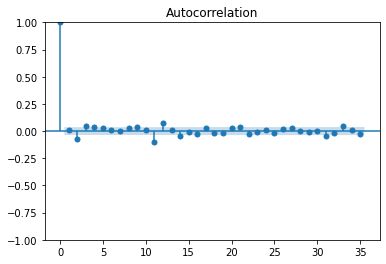

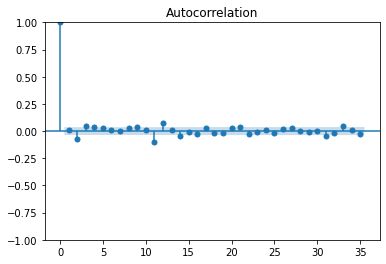

In [15]:
plot_acf(close_diff)

<AxesSubplot:xlabel='Date'>

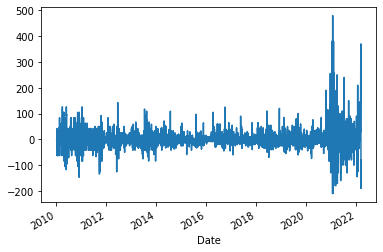

In [16]:
close_diff.plot()

In [17]:
X = close.values
size = int(len(X) * 0.67)
train, test = X[0:size], X[size:len(X)]
# train = X[0:27] # 27 data as train data
# test = X[26:]  # 9 data as test data
predictions = []

In [18]:
train.size

2026

# Autoreggresive AR Model

In [41]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [50]:
predictions = model_ar_fit.predict(start=26,end=36)

In [51]:
test

array([[439],
       [401],
       [390],
       [490],
       [408],
       [490],
       [420],
       [520],
       [480]])

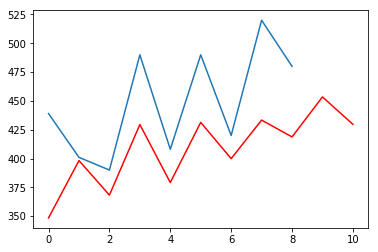

In [52]:
plt.plot(test)
plt.plot(predictions,color='red')

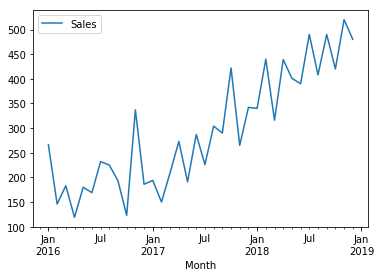

In [49]:
sales.plot()

# ARIMA model

In [21]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(1, 1, 2))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

19011.63376281222


In [33]:
predictions= model_arima_fit.forecast(steps=5)[0]
predictions

845.8311555016738

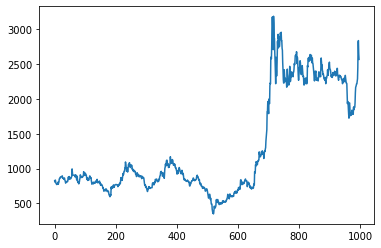

In [29]:
plt.plot(test)
plt.plot(predictions,color='red')

In [34]:
mean_absolute_error(test,predictions)

TypeError: Singleton array 845.8311555016738 cannot be considered a valid collection.

In [31]:
import itertools
p=d=q=range(0,5)
pdq = list(itertools.product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [35]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train,order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue
    

(0, 0, 0) 30712.731769644644
(0, 0, 1) 28079.61033132488
(0, 0, 2) 26006.701086839763
(0, 0, 3) 24459.351925535142
(0, 0, 4) 24256.290618676114
(0, 1, 0) 19008.076055111822
(0, 1, 1) 19009.030549418305
(0, 1, 2) 19010.879071938456
(0, 1, 3) 19007.986883461785
(0, 1, 4) 19009.82928257253
(0, 2, 0) 20447.598906147738
(0, 2, 1) 19008.477434576766
(0, 2, 2) 19009.45630742113
(0, 2, 3) 19011.283376548552
(0, 2, 4) 19008.397118367866
(0, 3, 0) 22671.699240015063
(0, 3, 1) 20448.15116550349
(0, 3, 2) 19020.844546914654
(0, 3, 3) 19021.922068515814
(0, 3, 4) 19026.819505879466
(0, 4, 0) 25109.463303767247
(0, 4, 1) 22671.28039070718
(0, 4, 2) 20484.605626620854
(0, 4, 3) 19102.525756596886
(0, 4, 4) 19233.994042076432
(1, 0, 0) 19026.314640185155
(1, 0, 1) 19027.334548683073
(1, 0, 2) 19029.209013061354
(1, 0, 3) 19026.45395024833
(1, 0, 4) 19028.275568466066
(1, 1, 0) 19009.046558791117
(1, 1, 1) 19009.800631450424
(1, 1, 2) 19011.63376281222
(1, 1, 3) 19009.802635465807
(1, 1, 4) 19011.86379